## Import Libraries

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Dataset

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head() # Kyphosis absense or present after operation, age in months, number of vertebrae, start vertebrae

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


## Splitting the dataset into Train and Test sets

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Building the Model - Decision Trees

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

## Training the Model

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Evaluating the Model 

In [11]:
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [13]:
print(classification_report(y_test,predictions))
# The support is the number of occurrences of each class in y_test.

              precision    recall  f1-score   support

      absent       0.94      0.85      0.89        20
     present       0.57      0.80      0.67         5

    accuracy                           0.84        25
   macro avg       0.76      0.82      0.78        25
weighted avg       0.87      0.84      0.85        25



In [14]:
print(accuracy_score(y_test,predictions))

0.84


In [15]:
print(confusion_matrix(y_test,predictions))

[[17  3]
 [ 1  4]]


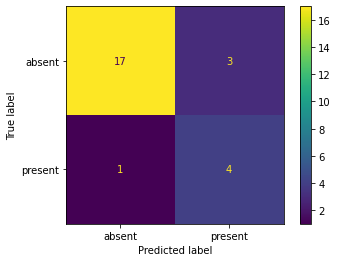

In [16]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtree, X_test, y_test)  
plt.show()

## Random Forests

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100) #n_estimators: The number of trees in the forest.
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
rfc_pred = rfc.predict(X_test)

In [19]:
print(confusion_matrix(y_test,rfc_pred))

[[19  1]
 [ 3  2]]


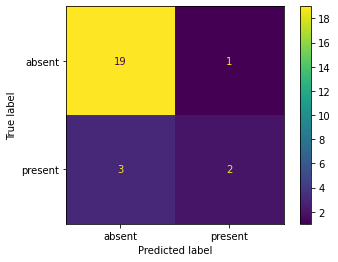

In [20]:
plot_confusion_matrix(rfc, X_test, y_test)  
plt.show()

In [21]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.86      0.95      0.90        20
     present       0.67      0.40      0.50         5

    accuracy                           0.84        25
   macro avg       0.77      0.68      0.70        25
weighted avg       0.82      0.84      0.82        25



In [22]:
print(accuracy_score(y_test,predictions))

0.84


# Resources
- https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp